# 2003.14 t-SNE & UMAP 試行

参照: https://qiita.com/cheerfularge/items/27a55ebde4a671880666

t-SNE、UMAPを試行。MNIST 8x8手書き数字画像1797枚を使用。

分けられた分布の状況を調べ。

## Lib & Path

In [42]:
import numpy as np
import matplotlib.pyplot as plt

## Load

In [2]:
# sec: load

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


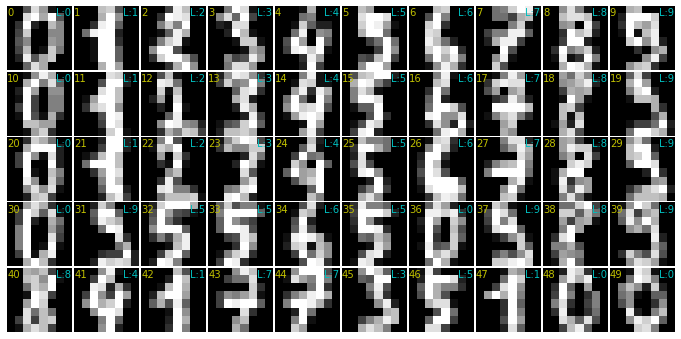

In [116]:
# sec: MNISTの画像を描画

def draw_digits(i_list, n_grid=(10, 10), figsize=(12, 12)):
    
    fig = None
    i_ax = 0
    for i_img in i_list:

        if fig is None or i_ax >= n_grid[0] * n_grid[1]:
            fig = plt.figure(figsize=figsize)
            plt.subplots_adjust(hspace=0.02, wspace=0)
            i_ax = 0
        i_ax += 1

        ax = fig.add_subplot(n_grid[0], n_grid[1], i_ax)
        if i_img is None:
            ax.axis('off')
            continue
        
        ax.imshow(digits.images[i_img], cmap='gray', interpolation='none')
        ax.annotate("%d" % i_img, 
            xy=(0, 0.98), xycoords='axes fraction', ha='left', va='top', color='y', fontsize=10)
        ax.annotate("L:%d" % digits.target[i_img], 
            xy=(1, 0.98), xycoords='axes fraction', ha='right', va='top', color='c', fontsize=10)
        ax.axis('off')

    plt.show()
    
draw_digits(list(range(50)))

## t-SNEを実行

In [ ]:
from sklearn.manifold import TSNE

In [19]:
# sec: 実行

model = TSNE(n_components=2) # 2軸へ次元圧縮
res = model.fit_transform(digits.data)
print(res.shape)

(1797, 2)


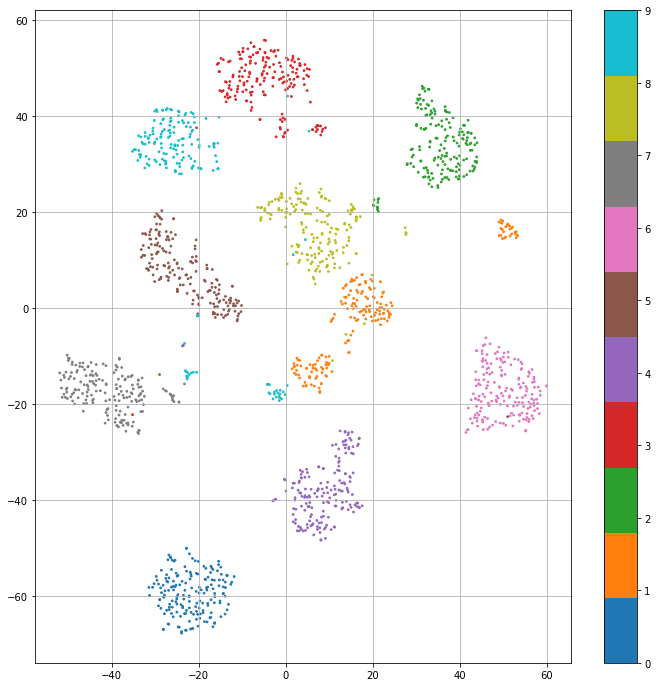

In [73]:
# sec: 結果の描画

import matplotlib.cm as cm
plt.figure(figsize=(12, 12))
plt.scatter(res[:,0], res[:,1], s=3, c=digits.target, cmap=cm.tab10)
plt.colorbar()
plt.grid()
plt.show()

## 結果のグループを調べる

In [21]:
# sec: 結果を保存 毎回実行で変わる為

import pickle
with open("./results/2003 t-SNE/res-tsne-1.pickle", 'wb') as file:
    pickle.dump(res, file)

In [13]:
# sec: 結果を読み込み 前回の続きから

import pickle
with open("./results/2003 t-SNE/res-tsne-1.pickle", 'rb') as file:
    res = pickle.load(file)

### 7の中の3を調べる

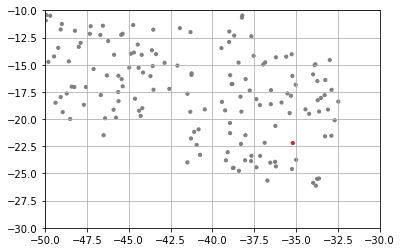

In [22]:
# sec: 7の中の3を調べる →1118番目のデータ ⇒確かに似ているもの同士が集まっている、解像度が低すぎる

plt.scatter(res[:, 0], res[:, 1], s=10, c=digits.target, cmap=cm.tab10)
plt.axis([-50, -30, -30, -10]); plt.grid(); plt.show()

In [23]:
i_list = np.where((-37.5 < res[:, 0]) & (res[:, 0] < -32.5) & (-25 < res[:, 1]) & (res[:, 1] < -20))[0]
i_list

array([  86,  283,  317,  374,  698,  707,  727,  740,  754,  758, 1118,
       1399, 1467], dtype=int64)

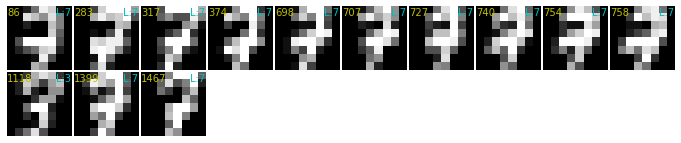

In [24]:
draw_digits(i_list)

### 7の集団の下側を調べる

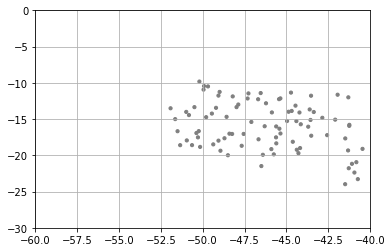

In [26]:
# sec: 7の集団の下側を調べる ⇒似ているか。やや丸みのない7が集まっている模様。

plt.scatter(res[:, 0], res[:, 1], s=10, c=digits.target, cmap=cm.tab10)
plt.axis([-60, -40, -30, -0]); plt.grid(); plt.show()

In [33]:
i_list = np.where((-55 < res[:, 0]) & (res[:, 0] < -50) & (-20 < res[:, 1]) & (res[:, 1] < -10))[0]
i_list

array([ 191,  216,  240,  819,  828,  870, 1373, 1587, 1595, 1604, 1627,
       1635, 1657], dtype=int64)

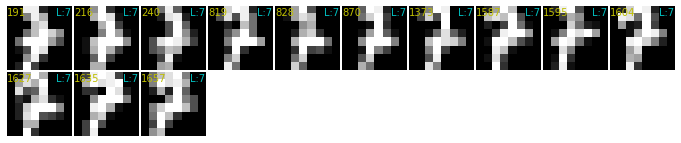

In [34]:
draw_digits(i_list)

### 7の集団の横方向の画像を並べて変化を見る

In [35]:
# sec: 7の集団の横方向の画像を並べて変化を見る

i_list = np.where((-60 < res[:, 0]) & (res[:, 0] < -30) & (-20 < res[:, 1]) & (res[:, 1] < -18))[0]
i_list

array([  17,   61,  118,  137,  147,  174,  182,  191,  216,  240,  300,
        350,  364,  559,  803,  820,  837,  857,  884,  888,  949, 1304,
       1330, 1381, 1422, 1432, 1442, 1476, 1496, 1527, 1748, 1753],
      dtype=int64)

In [40]:
i_list = i_list[np.argsort(res[i_list, 0])] # x方向でソート
i_list

array([ 191,  216,  240, 1748,  364, 1753,  350,  147,  884,  137,  182,
        803,  888,  857,  837,  118,  559,   17,   61, 1381,  820, 1304,
       1330, 1496,  174, 1476,  300, 1422, 1527, 1442, 1432,  949],
      dtype=int64)

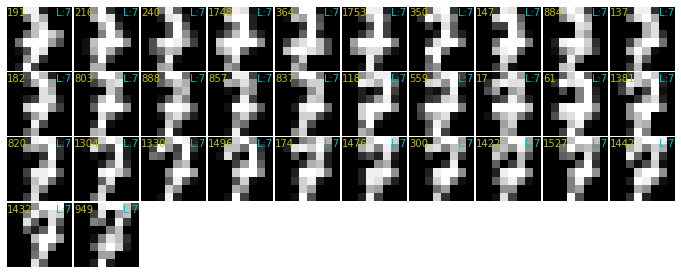

In [41]:
draw_digits(i_list)

## 10x10格子状に分けて画像を表示

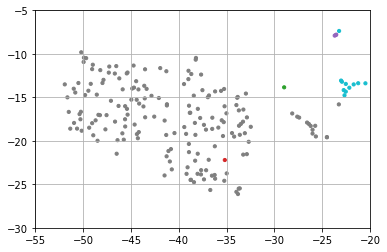

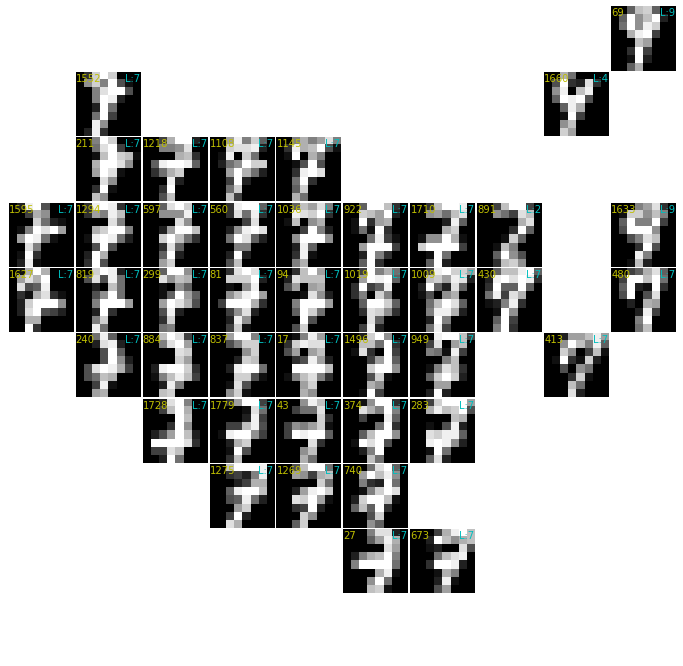

In [118]:
def draw_digits_in_grid(res, x_min, x_max, y_min, y_max, n_grid=(10, 10)):
    
    x_pitch = (x_max - x_min) / n_grid[1]
    y_pitch = (y_max - y_min) / n_grid[0]
    i_draw_list = []
    for i_y in range(n_grid[0]):
        y_i = y_max - y_pitch * i_y - y_pitch/2 # 格子中央点
        for i_x in range(n_grid[1]):
            x_i = x_min + x_pitch * i_x + x_pitch/2 # 格子中央点
            
            i_list = np.where((x_i-x_pitch/2 < res[:, 0]) & (res[:, 0] < x_i+x_pitch/2) & \
                              (y_i-y_pitch/2 < res[:, 1]) & (res[:, 1] < y_i+y_pitch/2))[0] # 格子内の点を集める
            res_i = res[i_list, :]
            if len(res_i) == 0: # if: 格子内に点なし
                i_draw_list.append(None)
                continue
            
            r2_i = ((res_i[:, 0] - x_i) / x_pitch)**2 + ((res_i[:, 1] - y_i) / y_pitch)**2 # 格子中央と点との距離
            i_min = i_list[np.argmin(r2_i)] # 格子中央に最も近い点
            i_draw_list.append(i_min)
    
    plt.scatter(res[:, 0], res[:, 1], s=10, c=digits.target, cmap=cm.tab10) # 指定範囲内の点の分布を描画
    plt.axis([x_min, x_max, y_min, y_max]); plt.grid(); plt.show()
    
    draw_digits(i_draw_list, n_grid=n_grid)

draw_digits_in_grid(res, -55, -20, -30, -5)

### 各数字の集団の分布状況を描画

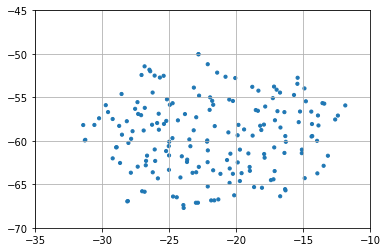

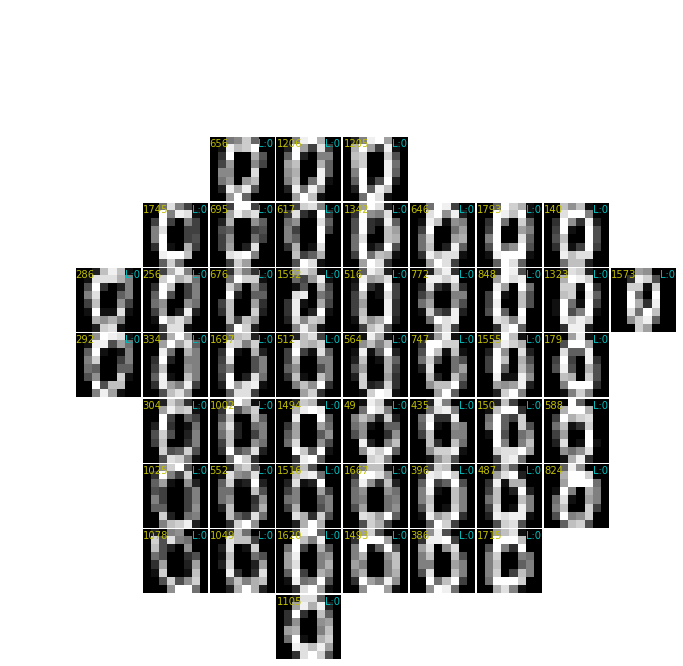

In [59]:
# sec: 各数字の集団の分布状況を描画 

draw_digits_in_grid(res, -35, -10, -70, -45) # 0周り

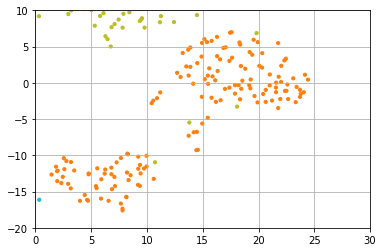

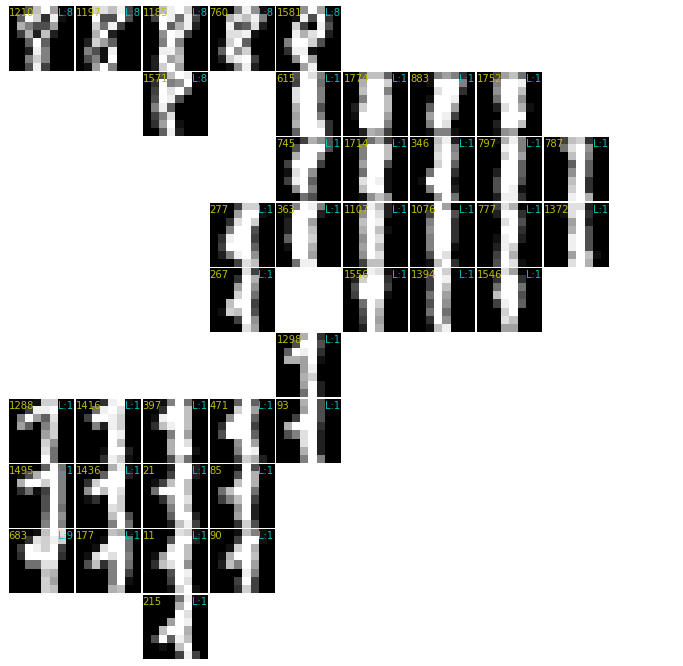

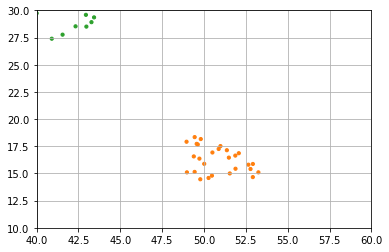

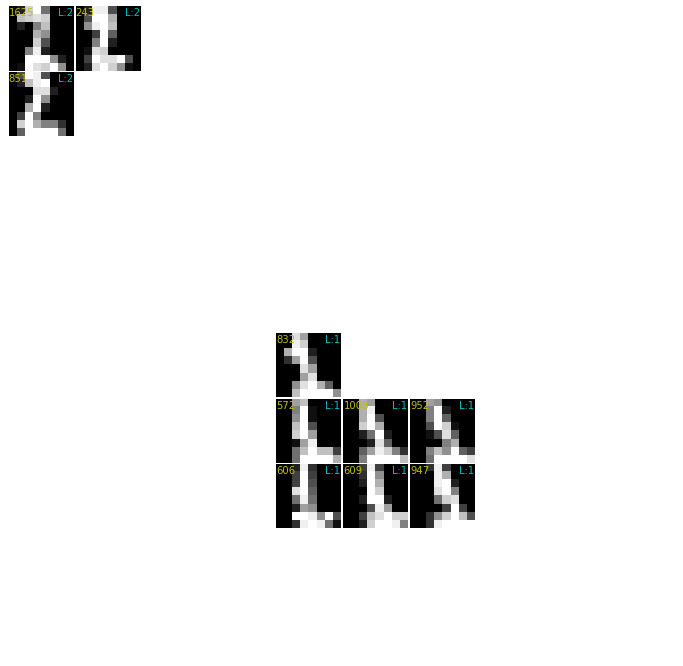

In [60]:
draw_digits_in_grid(res, 0, 30, -20, 10) # 1周り
draw_digits_in_grid(res, 40, 60, 10, 30) # 1周り

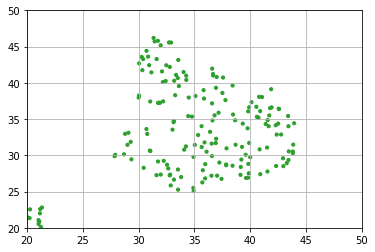

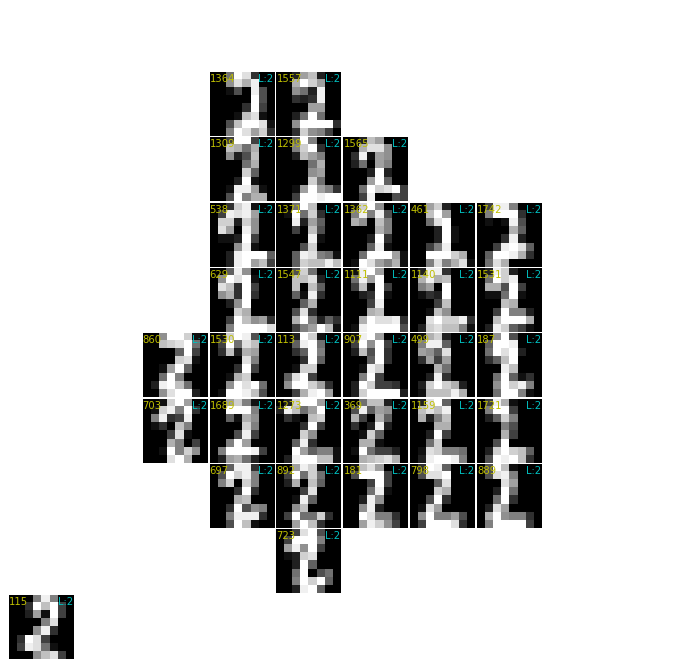

In [61]:
draw_digits_in_grid(res, 20, 50, 20, 50) # 2周り

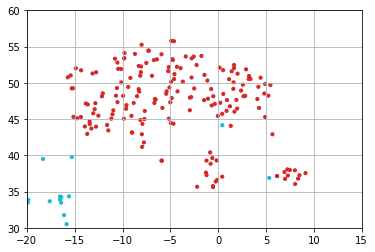

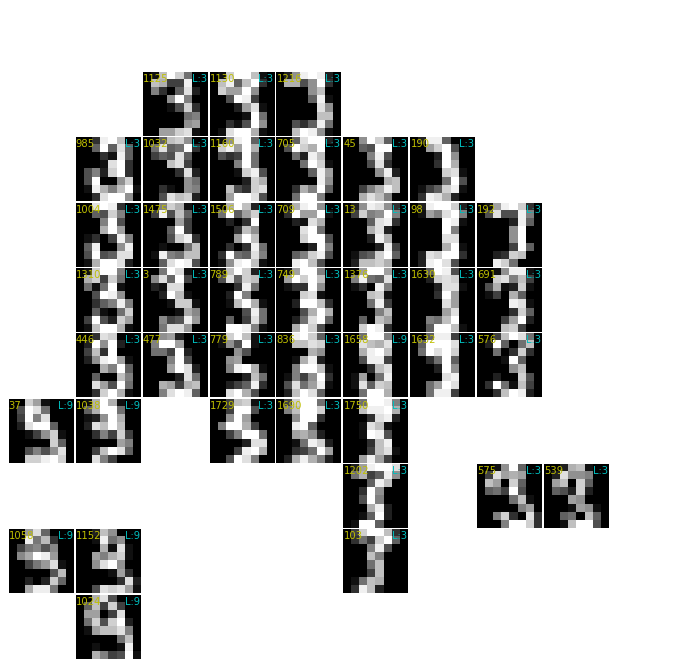

In [62]:
draw_digits_in_grid(res, -20, 15, 30, 60) # 3周り

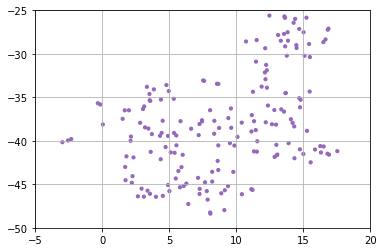

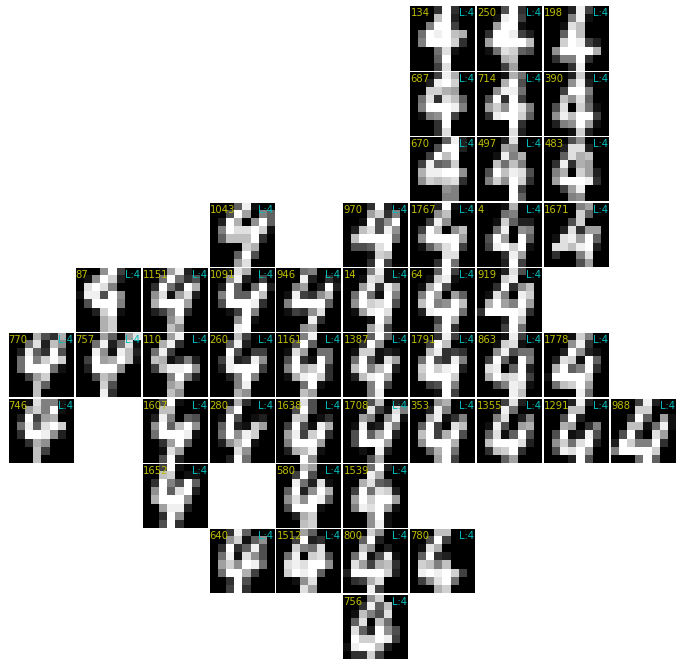

In [69]:
draw_digits_in_grid(res, -5, 20, -50, -25) # 4周り

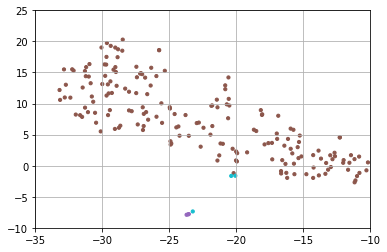

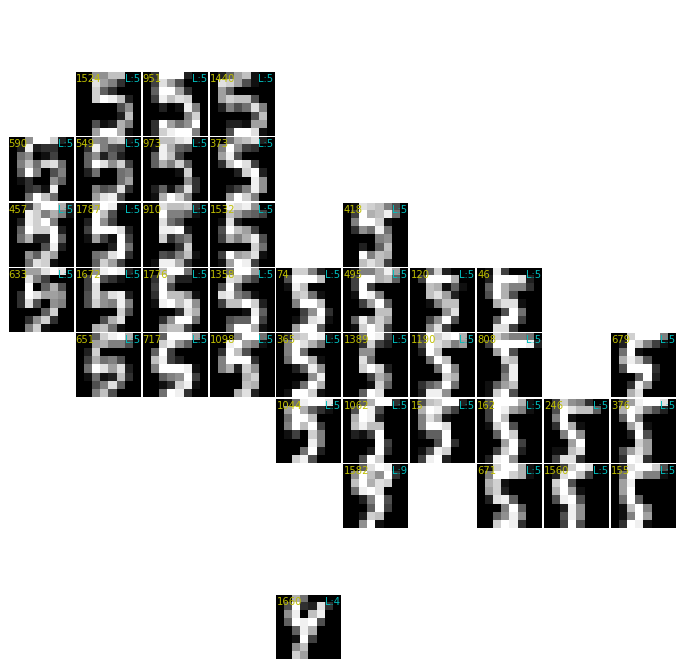

In [64]:
draw_digits_in_grid(res, -35, -10, -10, 25) # 5周り

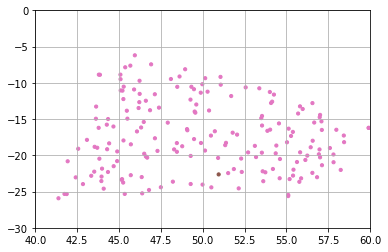

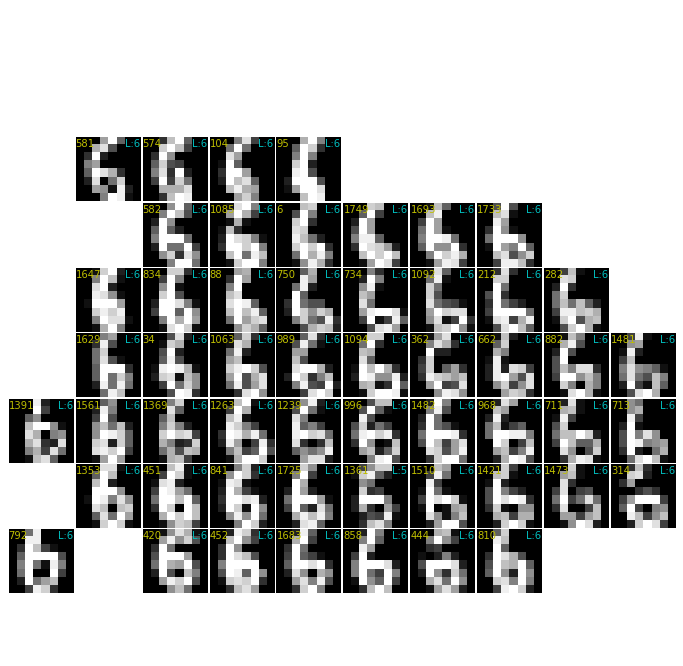

In [65]:
draw_digits_in_grid(res, 40, 60, -30, 0) # 6周り

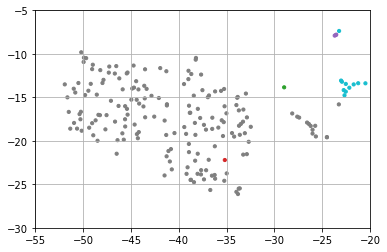

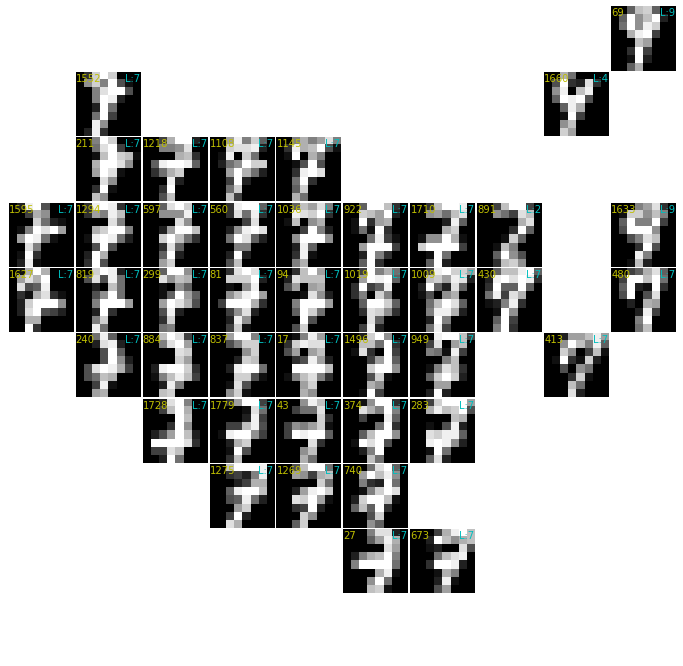

In [66]:
draw_digits_in_grid(res, -55, -20, -30, -5) # 7周り

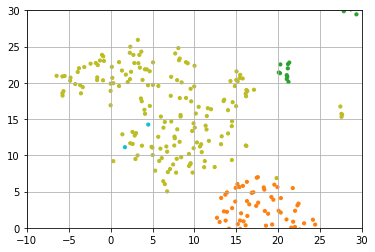

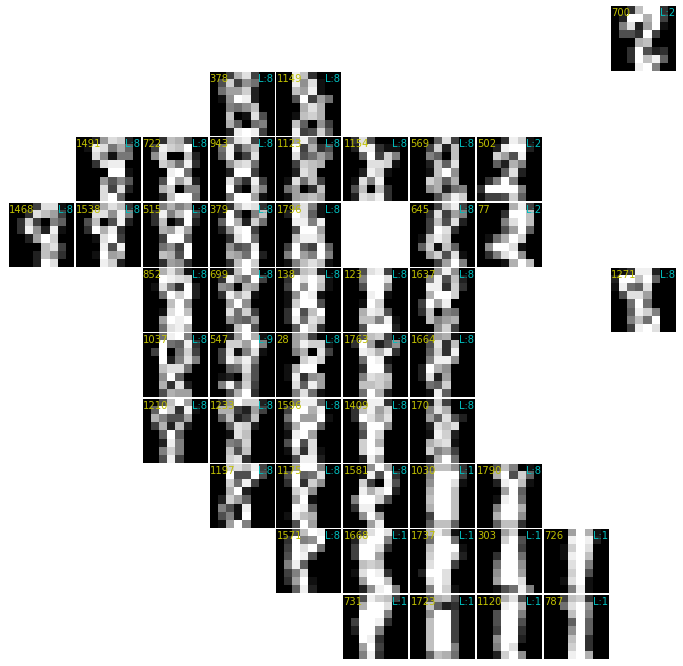

In [67]:
draw_digits_in_grid(res, -10, 30, 0, 30) # 8周り

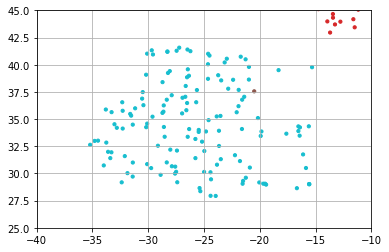

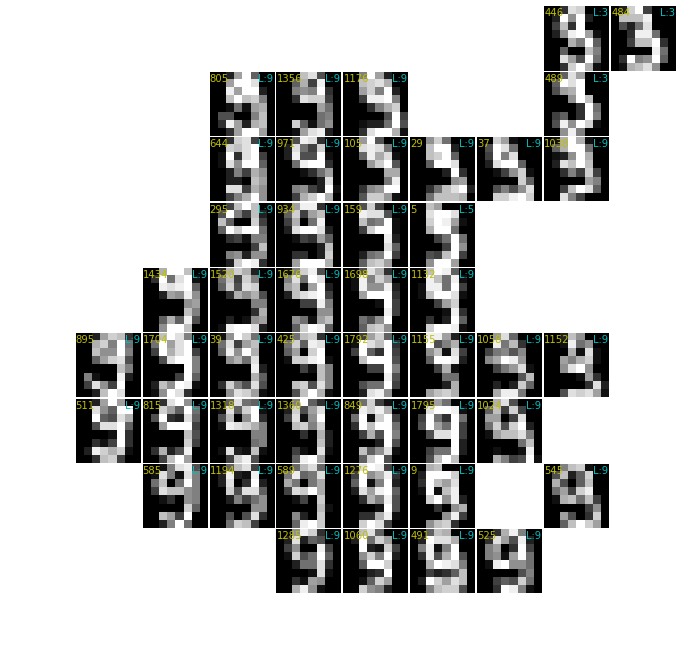

In [68]:
draw_digits_in_grid(res, -40, -10, 25, 45) # 9周り

### やや広めに分布状況を描画

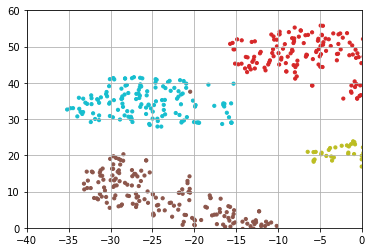

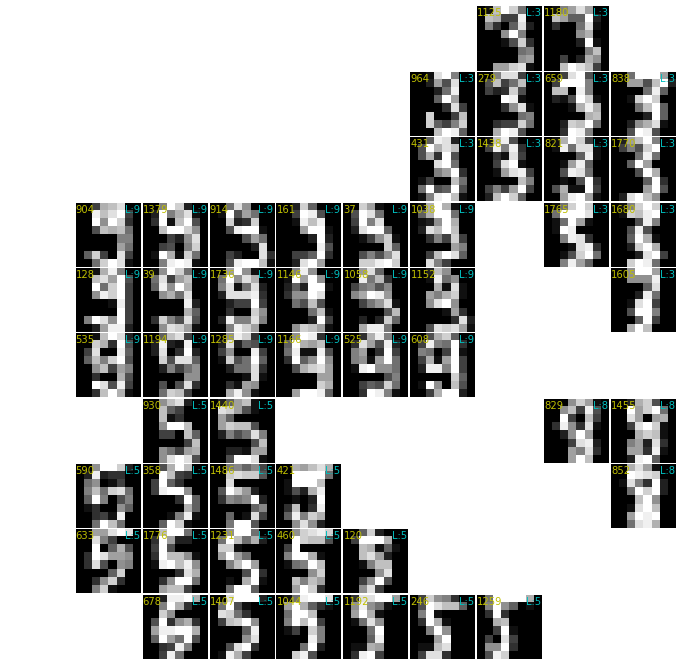

In [98]:
# sec: やや広めに分布状況を描画 

draw_digits_in_grid(res, -40, 0, 0, 60) # 左上半面

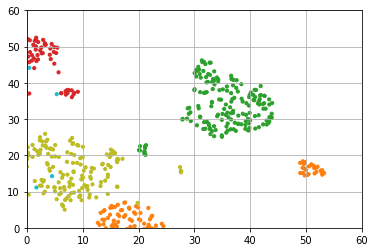

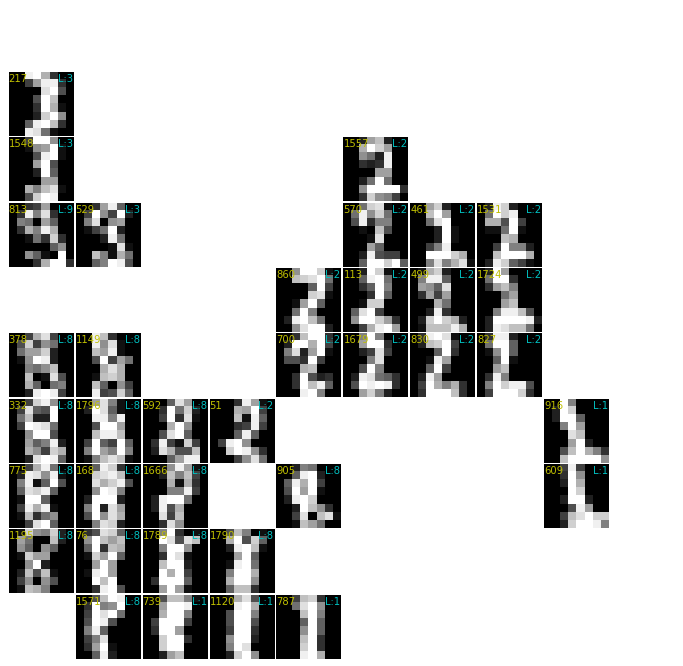

In [99]:
draw_digits_in_grid(res, 0, 60, 0, 60) # 右上半面

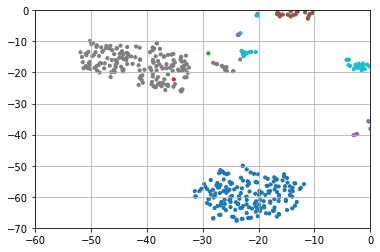

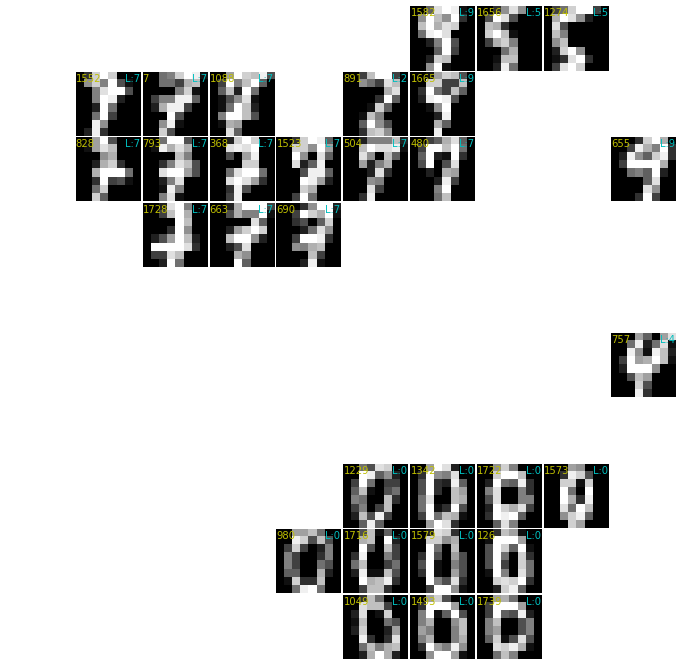

In [100]:
draw_digits_in_grid(res, -60, 0, -70, 0) # 左下半面

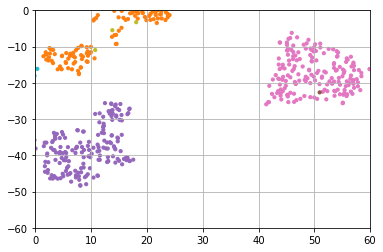

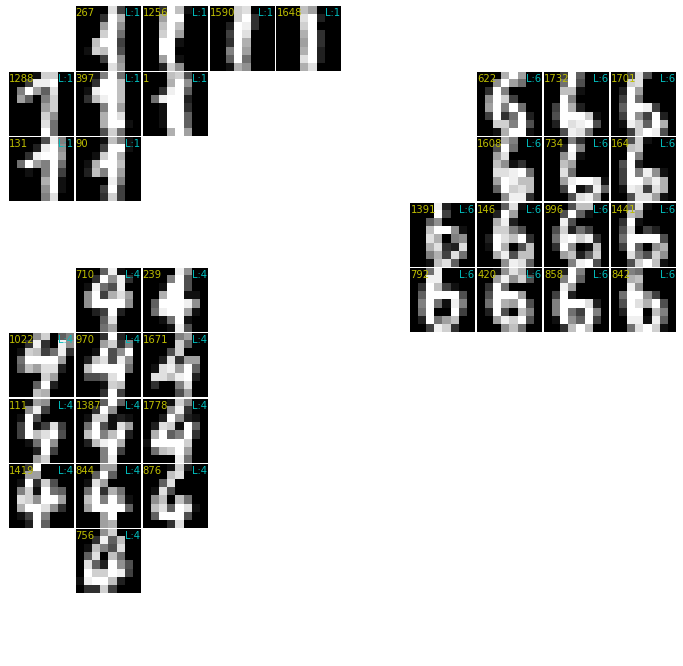

In [101]:
draw_digits_in_grid(res, 0, 60, -60, 0) # 右下半面

### 全体の分布状況を描画

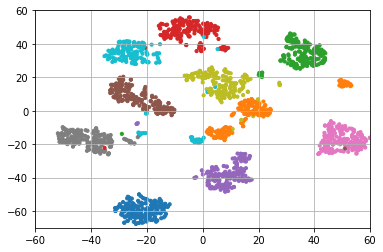

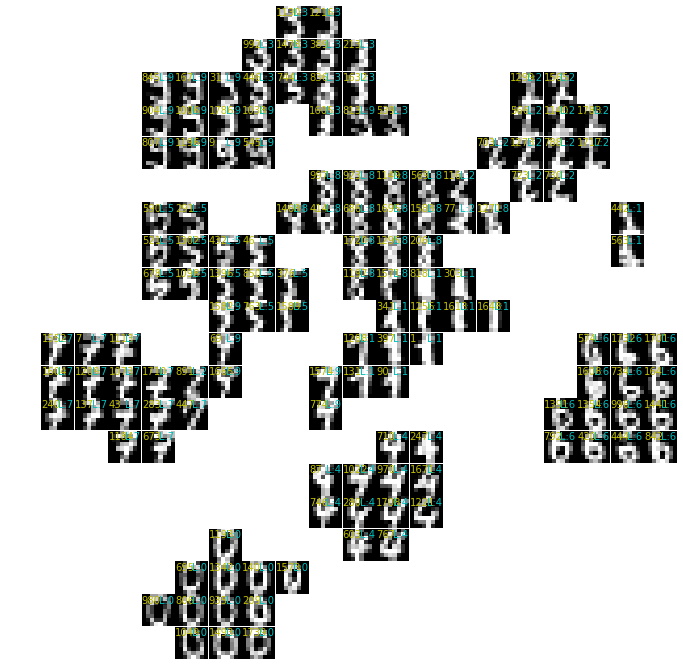

In [119]:
draw_digits_in_grid(res, -60, 60, -70, 60, n_grid=(20, 20))

# UMAPを試す

In [6]:
!pip3 install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.3.10-cp37-none-any.whl size=38886 sha256=9d57f567f0ec496157a12d90e1212d52ca01cc14510a12335a06eeef5f0766c2
  Stored in directory: ...\AppData\Local\pip\Cache\wheels\d0\f8\d5\8e3af3ee957feb9b403a060ebe72f7561887fef9dea658326e
Successfully built umap-learn


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import umap
from scipy.sparse.csgraph import connected_components
# 公式GitHubには書いてあるのですが、↑を書かないとエラーが出てしまいます。

In [70]:
# sec: 実行

res_umap = umap.UMAP().fit_transform(digits.data)
print(res_umap.shape)

(1797, 2)


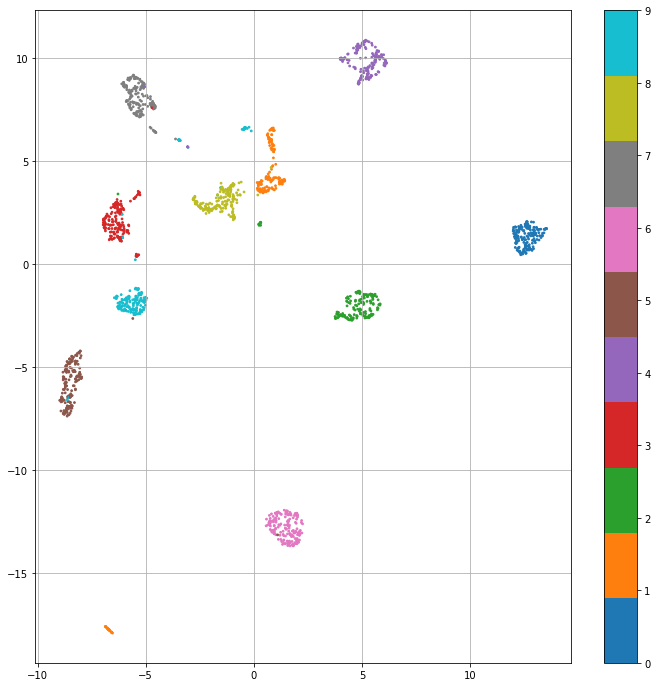

In [72]:
# sec: 結果の描画

import matplotlib.cm as cm
plt.figure(figsize=(12, 12))
plt.scatter(res_umap[:,0], res_umap[:,1], s=3, c=digits.target, cmap=cm.tab10)
plt.colorbar()
plt.grid()
plt.show()

## 結果のグループを調べる

In [74]:
# sec: 結果を保存 毎回実行で変わる為

import pickle
with open("./results/2003 t-SNE/res-umap-1.pickle", 'wb') as file:
    pickle.dump(res_umap, file)

In [13]:
# sec: 結果を読み込み 前回の続きから

import pickle
with open("./results/2003 t-SNE/res-umap-1.pickle", 'rb') as file:
    res_umap = pickle.load(file)

### 各数字の集団の分布状況を描画

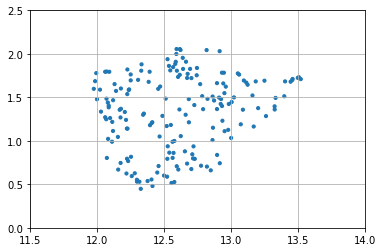

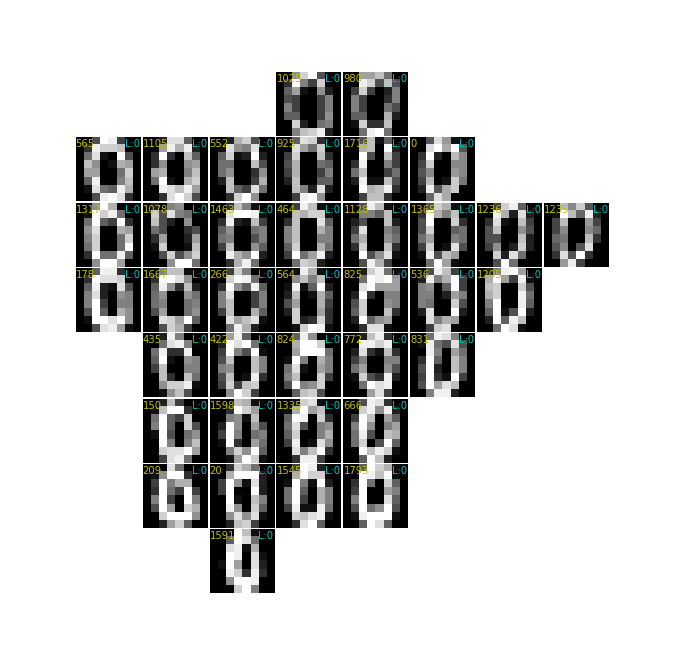

In [76]:
# sec: 各場所の数字の分布状況を描画

draw_digits_in_grid(res_umap, 11.5, 14, 0, 2.5) # 0周り

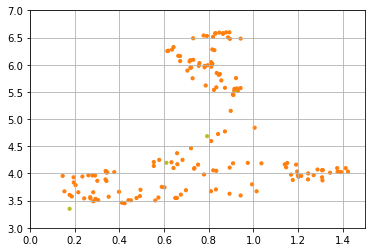

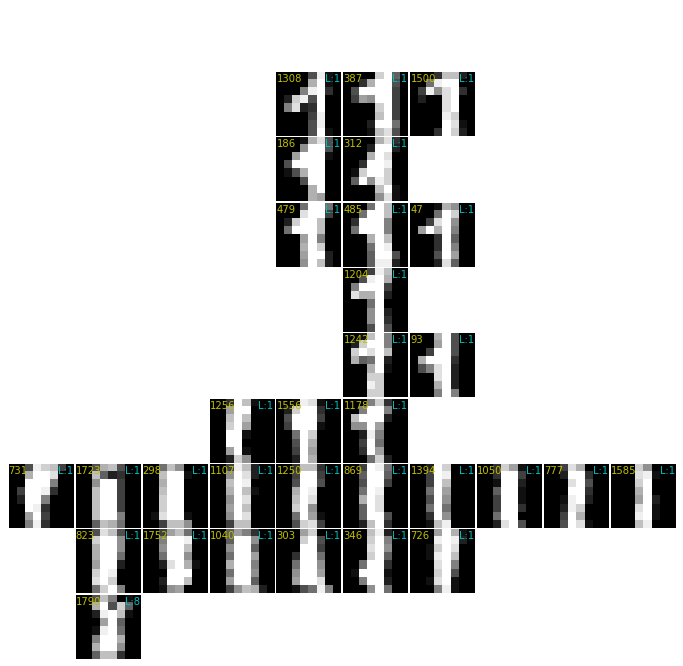

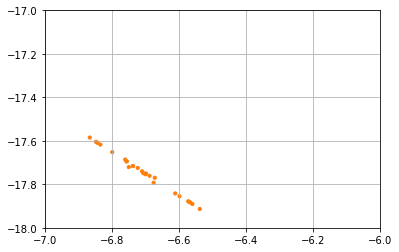

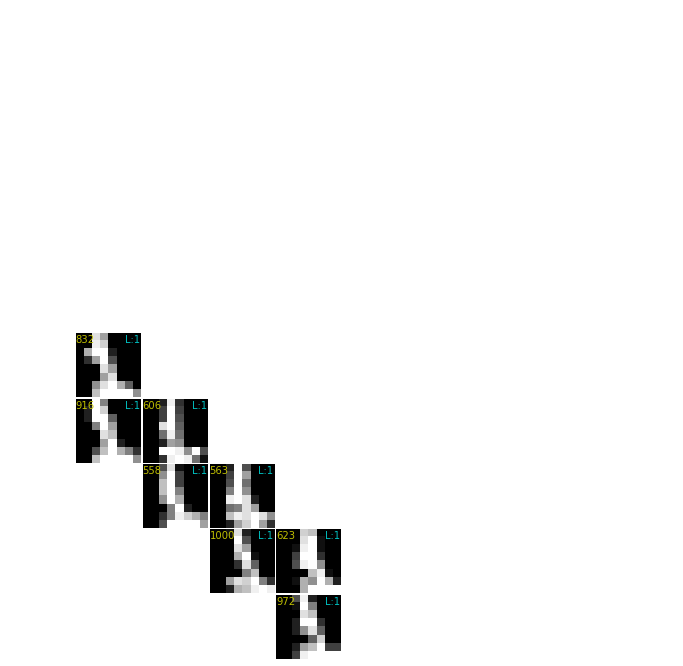

In [79]:
draw_digits_in_grid(res_umap, 0, 1.5, 3, 7) # 1周り
draw_digits_in_grid(res_umap, -7, -6, -18, -17) # 1周り

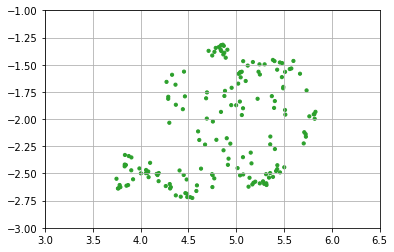

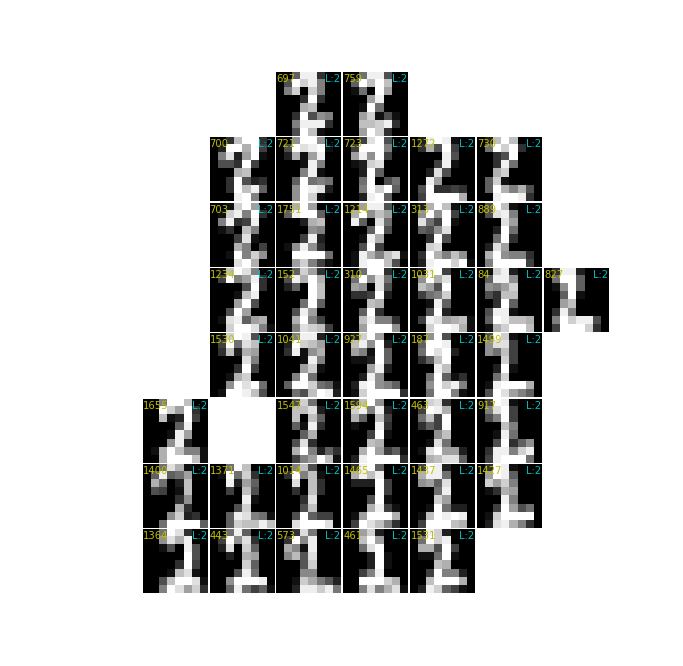

In [84]:
draw_digits_in_grid(res_umap, 3, 6.5, -3, -1) # 2周り

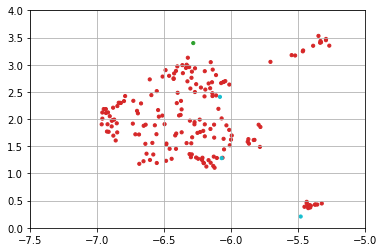

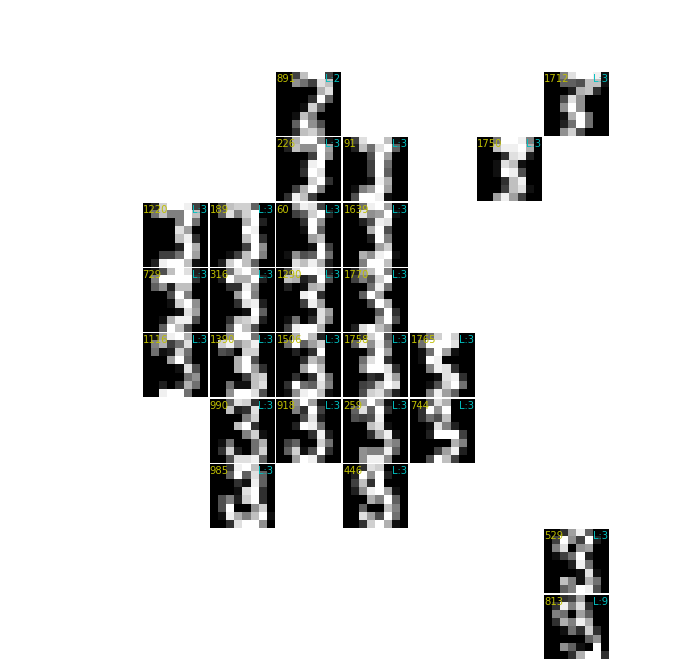

In [83]:
draw_digits_in_grid(res_umap, -7.5, -5, 0, 4) # 3周り

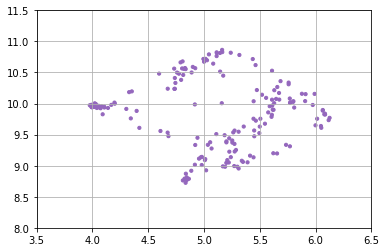

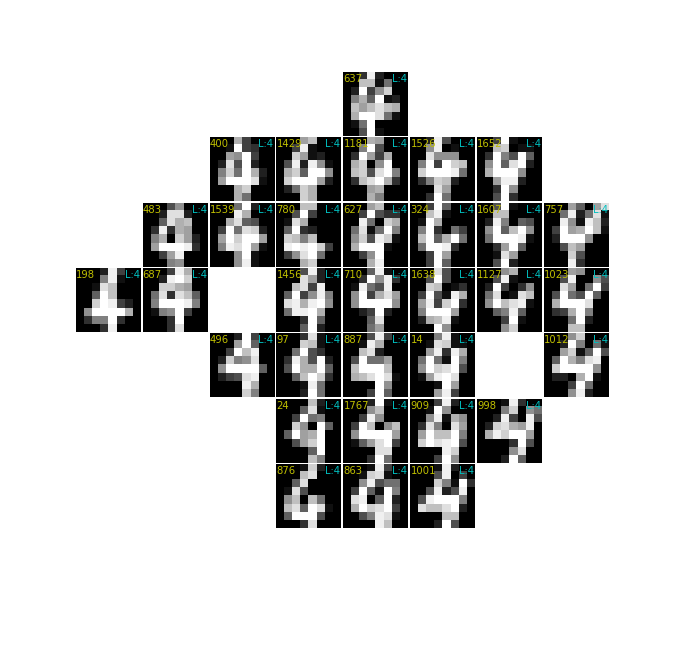

In [86]:
draw_digits_in_grid(res_umap, 3.5, 6.5, 8, 11.5) # 4周り

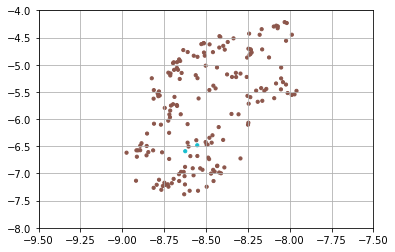

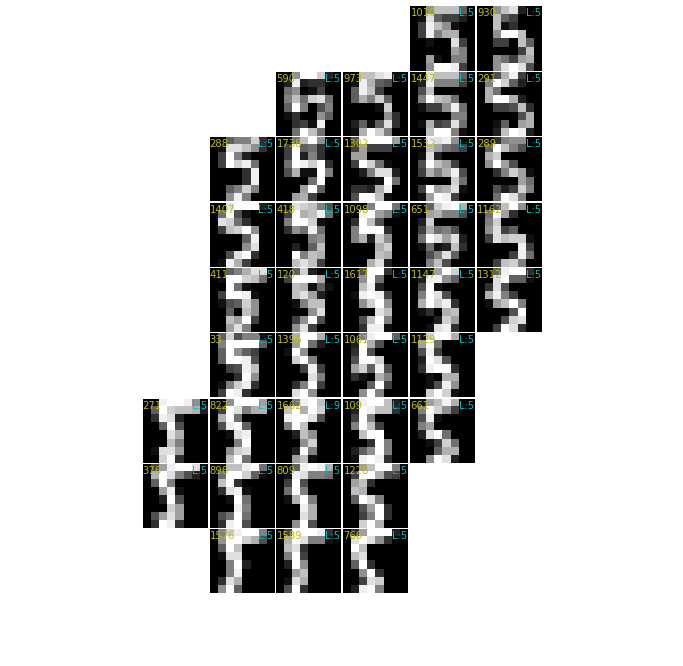

In [88]:
draw_digits_in_grid(res_umap, -9.5, -7.5, -8, -4) # 5周り

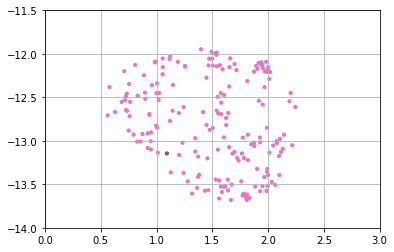

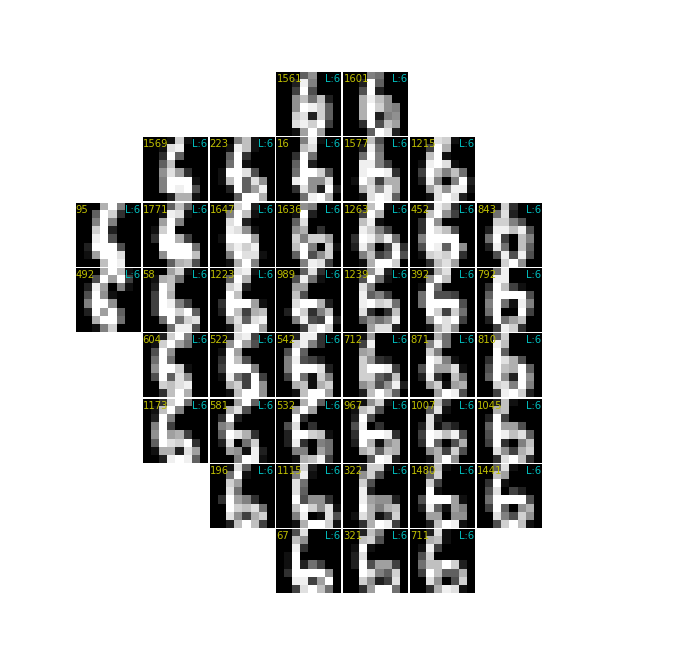

In [90]:
draw_digits_in_grid(res_umap, 0, 3, -14, -11.5) # 6周り

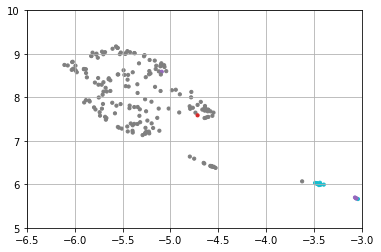

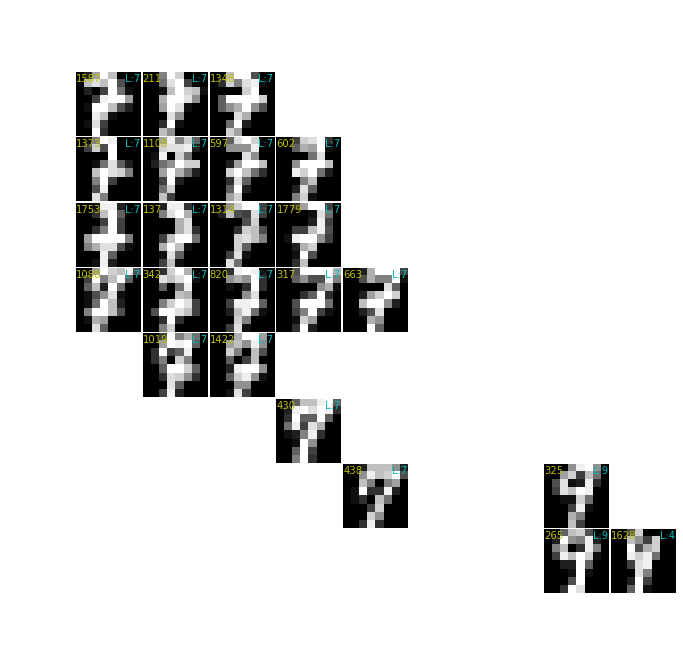

In [92]:
draw_digits_in_grid(res_umap, -6.5, -3, 5, 10) # 7周り

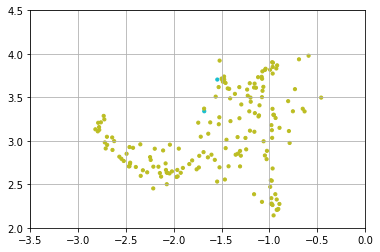

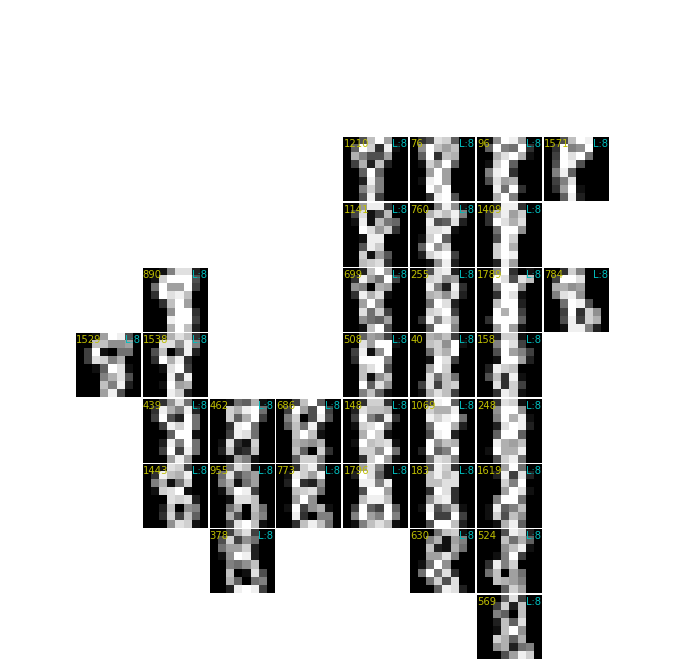

In [94]:
draw_digits_in_grid(res_umap, -3.5, 0, 2, 4.5) # 8周り

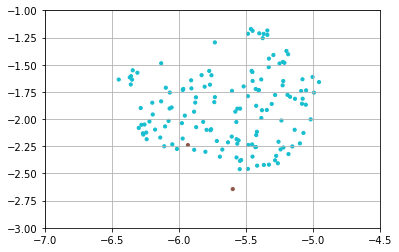

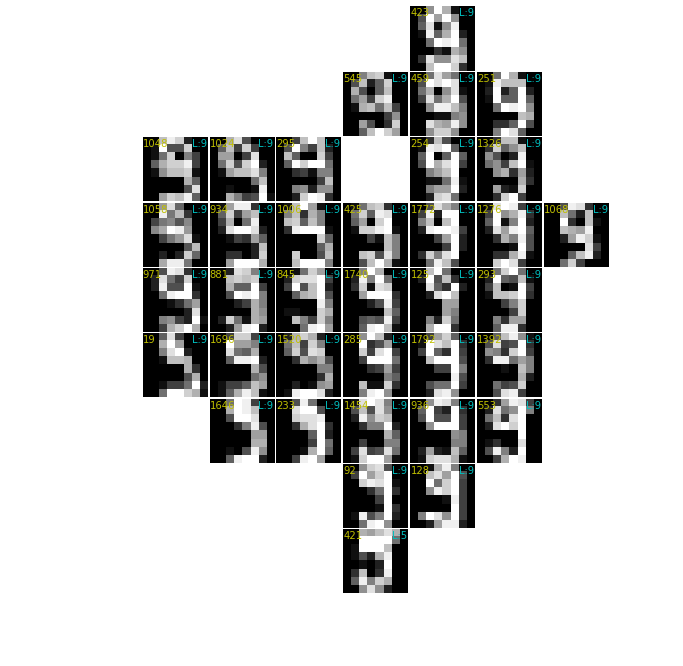

In [96]:
draw_digits_in_grid(res_umap, -7, -4.5, -3, -1) # 9周り